In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
# Crosstab: category vs isBestSeller
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Print the crosstab result
print(crosstab_result)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [8]:
# Are there categories where being a best-seller is more prevalent

# Group by category and calculate total and best-seller counts
category_stats = df.groupby('category')['isBestSeller'].agg(
    total_products='count',
    best_sellers='sum'
)

# Calculate proportion of best-sellers
category_stats['best_seller_rate'] = category_stats['best_sellers'] / category_stats['total_products']

# Sort by best-seller rate descending
category_stats = category_stats.sort_values(by='best_seller_rate', ascending=False)

print(category_stats)

                                total_products  best_sellers  best_seller_rate
category                                                                      
Grocery                                   9564           556          0.058135
Smart Home Security & Lighting             104             6          0.057692
Health & Personal Care                    9569           552          0.057686
Mobile Phone Accessories                   259            11          0.042471
Power & Hand Tools                        8659           306          0.035339
...                                        ...           ...               ...
Projectors                                8698             0          0.000000
Printer Accessories                        254             0          0.000000
Power Supplies                             247             0          0.000000
Basketball Footwear                       6710             0          0.000000
Barebone PCs                              9478      

In [13]:
# Statistical Tests:

# Chi-square test

from scipy.stats import chi2_contingency

# contingency table (category vs isBestSeller)
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

# print results
print("\nChi-square Test Results:")
print(f"Chi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")

Contingency Table:
isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]

Chi-square Test Results:
Chi-square statistic = 36540.2027
Degrees of freedom = 295
P-value = 0.0000


In [15]:
import numpy as np

# Cramér's V
n = contingency_table.sum().sum()  # total sample size
min_dim = min(contingency_table.shape) - 1  # minimum dimension minus 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.1223


In [ ]:
# 0.1223 falls in the 0.1 to 0.3 range, which indicates a weak association between product category and best-seller status
# Chi-square test confirmed that category and best-seller status are not independent (there is some relationship), the strength of that relationship is relatively weak.



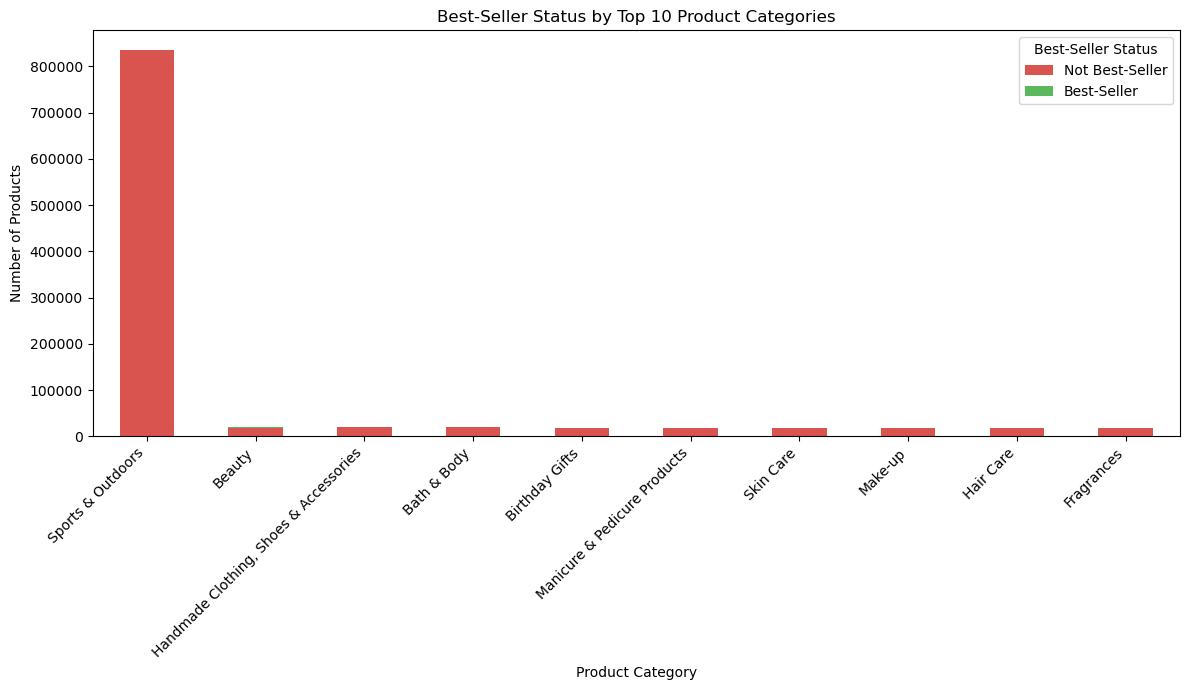

In [18]:
import matplotlib.pyplot as plt

# Crosstab for category vs isBestSeller (counts)
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate total products per category
crosstab['total'] = crosstab[False] + crosstab[True]

# Sort by total and select top 10
top10 = crosstab.sort_values('total', ascending=False).head(10)

# Drop the 'total' column before plotting
top10 = top10.drop('total', axis=1)

# Plot stacked bar chart for top 10 categories
ax = top10.plot(kind='bar', stacked=True, figsize=(12,7), color=['#d9534f', '#5cb85c'])

plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Best-Seller Status by Top 10 Product Categories')
plt.legend(['Not Best-Seller', 'Best-Seller'], title='Best-Seller Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [19]:
# Preliminary Step: Remove outliers in product prices

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter dataframe to keep only rows within the bounds (no outliers)
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Lower bound: -44.01
Upper bound: 99.99000000000001
Original dataset size: 2443651
Dataset size after removing outliers: 2115963


/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_86703/877136266.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_top20, x='category', y='price', inner='quartile', scale='width')


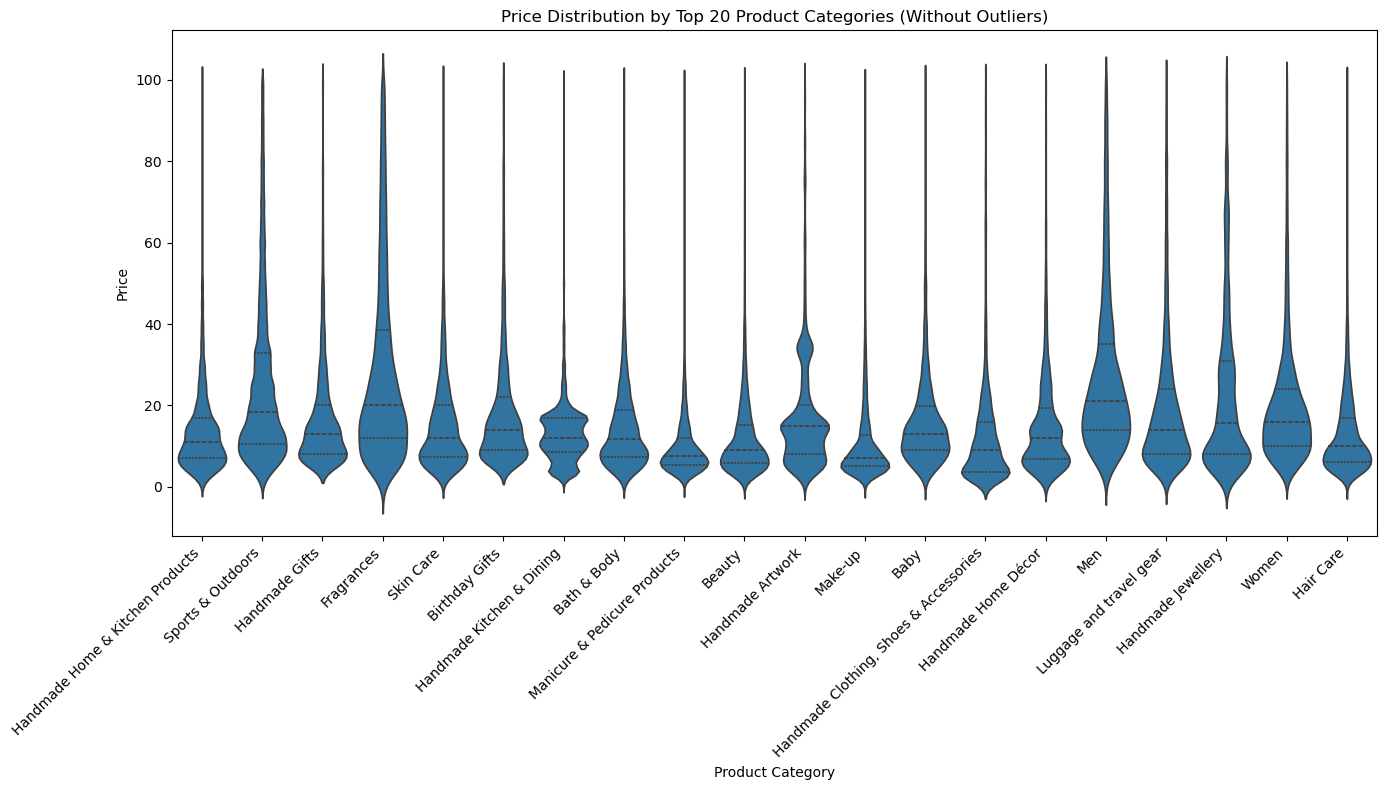

In [22]:
# violin plot

# find top 20 categories by count
top_categories = df_no_outliers['category'].value_counts().nlargest(20).index

# filter dataframe for those top categories
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_categories)]


plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top20, x='category', y='price', inner='quartile', scale='width')

plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Top 20 Product Categories (Without Outliers)')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [23]:
# Group by category and calculate median price
median_prices = df_no_outliers.groupby('category')['price'].median()

# Find category with highest median price
max_median_category = median_prices.idxmax()
max_median_value = median_prices.max()

print(f"Category with highest median price: {max_median_category}")
print(f"Median price: {max_median_value:.2f}")

Category with highest median price: Desktop PCs
Median price: 74.00


/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_86703/409657365.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')


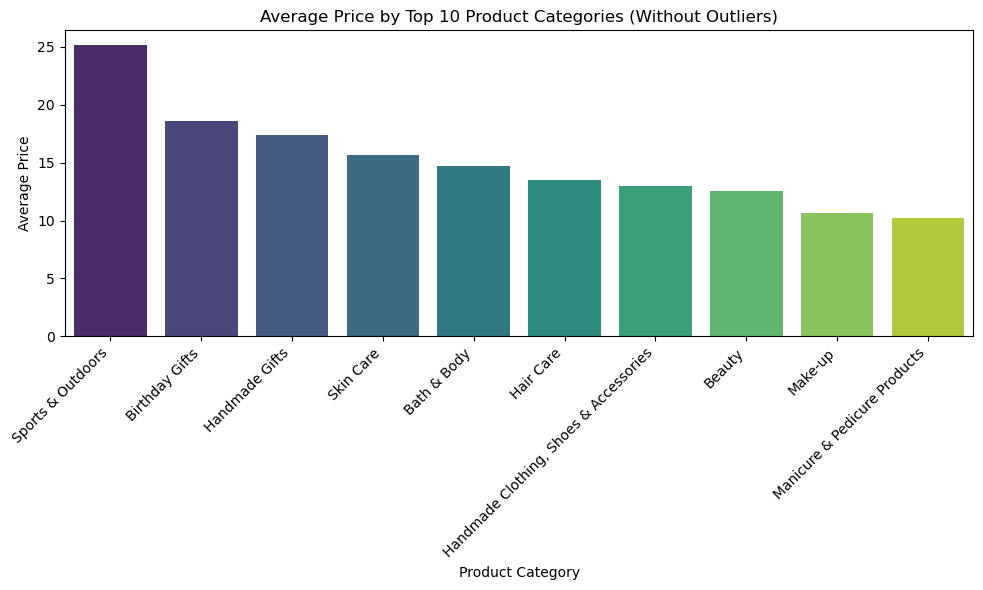

In [24]:
# Bar chart
# Find top 10 categories by product count
top10_categories = df_no_outliers['category'].value_counts().nlargest(10).index

# Filter dataframe for these categories
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]

# Calculate average price per category
avg_price = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price by Top 10 Product Categories (Without Outliers)')
plt.tight_layout()
plt.show()

In [25]:
# Which product category commands the highest average price?!

# Calculate average price per category
avg_prices = df_no_outliers.groupby('category')['price'].mean()

# Find category with highest average price
max_avg_category = avg_prices.idxmax()
max_avg_value = avg_prices.max()

print(f"Category with highest average price: {max_avg_category}")
print(f"Average price: {max_avg_value:.2f}")

Category with highest average price: Motherboards
Average price: 68.77


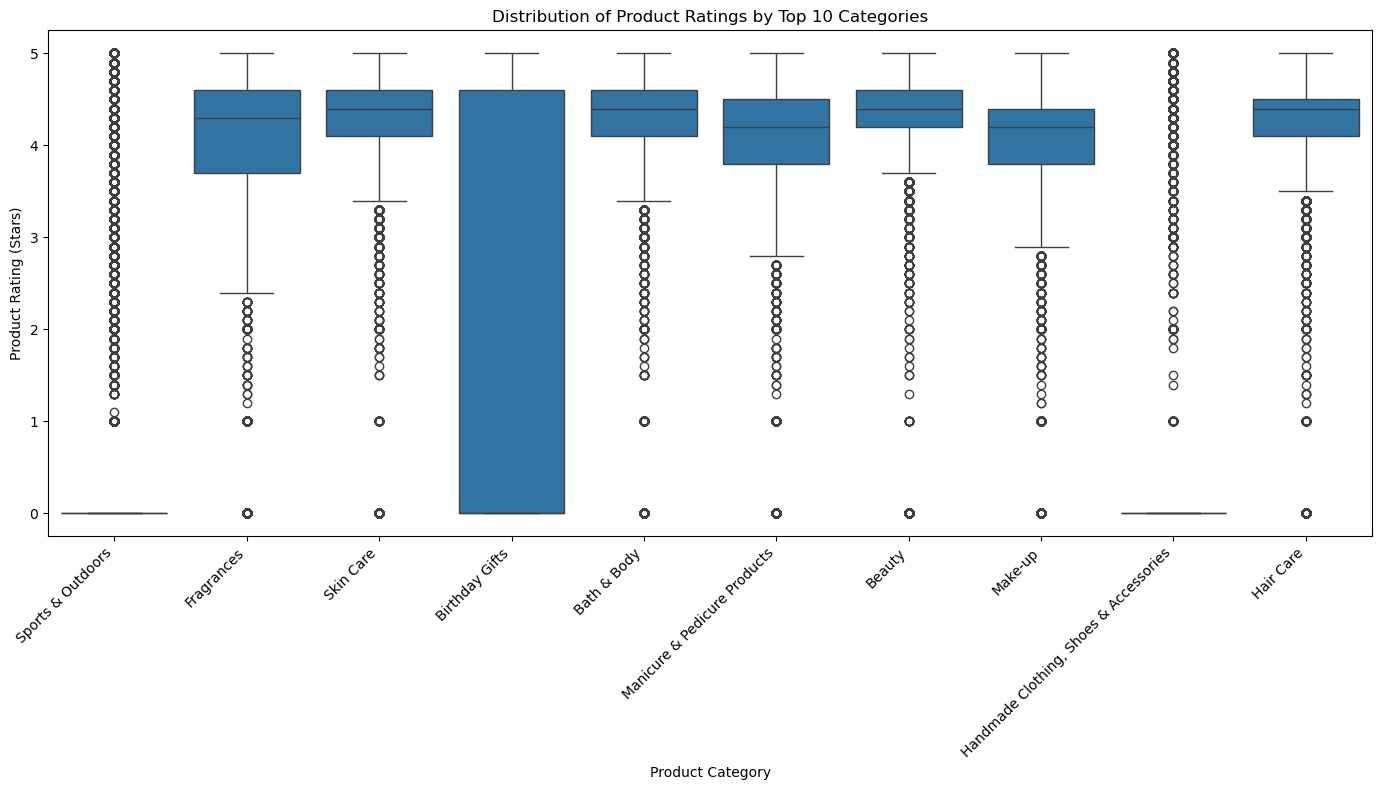

In [26]:
# top 10 categories by count
top10_categories = df['category'].value_counts().nlargest(10).index

# dataframe for these top categories
df_top10 = df[df['category'].isin(top10_categories)]

# side-by-side box plots for ratings by category
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top10, x='category', y='stars')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Product Rating (Stars)')
plt.title('Distribution of Product Ratings by Top 10 Categories')
plt.tight_layout()
plt.show()

In [ ]:
# category and calculate median rating
median_ratings = df.groupby('category')['stars'].median()

# category with the highest median rating
max_median_category = median_ratings.idxmax()
max_median_value = median_ratings.max()

print(f"Category with highest median rating: {max_median_category}")
print(f"Median rating: {max_median_value}")

Category with highest median rating: Computer Memory
Median rating: 4.7


In [28]:
# Pearson correlation coefficient
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

print(f"Correlation coefficient between price and stars: {correlation:.4f}")

Correlation coefficient between price and stars: -0.0777


In [ ]:
#The value is very close to 0, and slightly negative.

#This suggests a very weak negative correlation between price and customer ratings.

/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_86703/1926167483.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_86703/1926167483.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


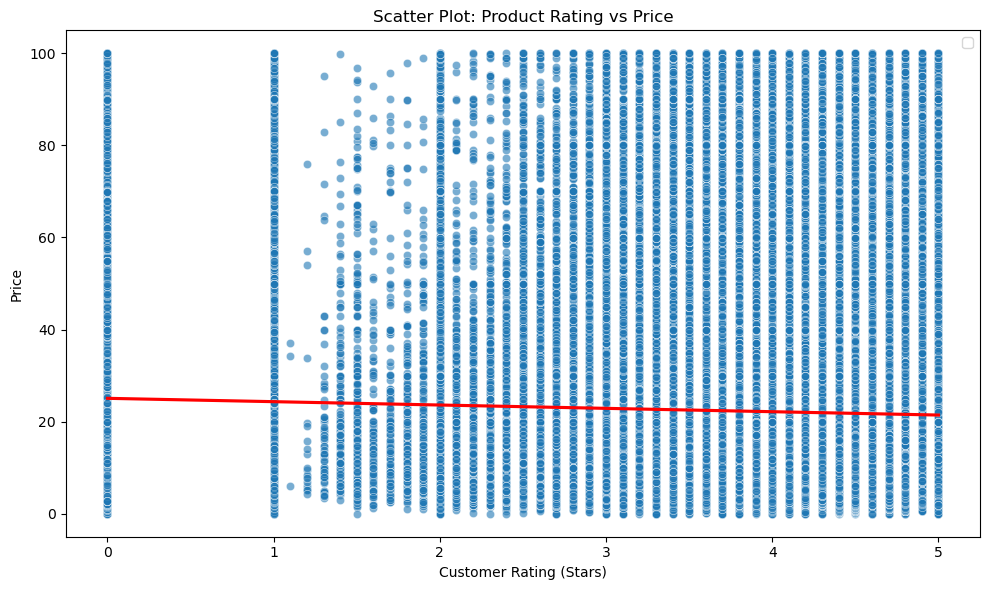

In [29]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='stars', y='price', alpha=0.6)
sns.regplot(data=df_no_outliers, x='stars', y='price', scatter=False, color='red', line_kws={'label': 'Trend Line'})

plt.title('Scatter Plot: Product Rating vs Price')
plt.xlabel('Customer Rating (Stars)')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

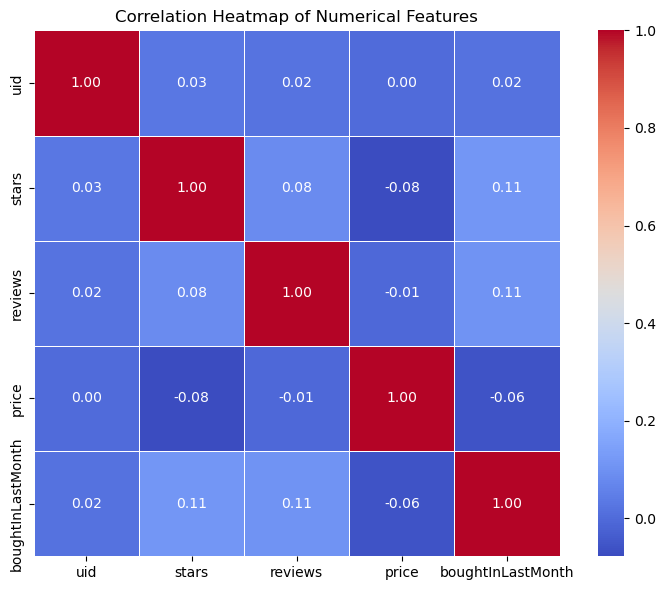

In [33]:
# Select only numerical columns
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

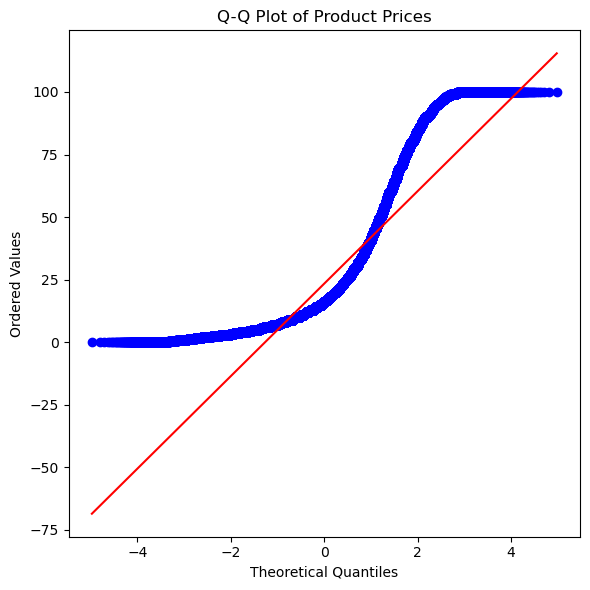

In [31]:
import scipy.stats as stats
# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)

plt.title("Q-Q Plot of Product Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.tight_layout()
plt.show()